In [1]:
import os
import json
import pathlib
import numpy as np
import pandas as pd
from dda import DDA
import tensorflow as tf
import fresnel
from matplotlib import pyplot as plt
def delete_1D(new_position,position):
    A=np.array(np.around(new_position,7)).tolist()
    B=np.array(np.around(position,7)).tolist()
    A = [i for i in A if i not in B]
    return A

In [2]:
# GPU Device Config
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"
current_folder_path = pathlib.Path().absolute()

# Simulate the initial structure quickly to see where the peak is

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(4.8235443e-06, shape=(), dtype=float32)
1
tf.Tensor(4.723585e-06, shape=(), dtype=float32)
2
tf.Tensor(4.6133596e-06, shape=(), dtype=float32)
3
tf.Tensor(4.5041984e-06, shape=(), dtype=float32)
4
tf.Tensor(4.423193e-06, shape=(), dtype=float32)
5
tf.Tensor(4.3465384e-06, shape=(), dtype=float32)
6
tf.Tensor(4.2476117e-06, shape=(), dtype=float32)
7
tf.Tensor(4.1592757e-06, shape=(), dtype=float32)
8
tf.Tensor(4.1340654e-06, shape=(), dtype=float32)
9
tf.Tensor(4.21824e-06, shape=(), dtype=float32)
10
tf.Tensor(4.451995e-06, shape=(), dtype=float32)
11
tf.Tensor(4.785285e-06, shape=(), dtype=float32)
12
tf.Tensor(5.0025933e-06, shape=(), dtype=float32)
13
tf.Tensor(4.8979928e-06, shape=(), dtype=float32)
14
tf.Tensor(4.5568027e-06, shape=(), dtype=float32)
15
tf.Tensor(4.1603544e-06, shape=(), dtype=float32)
16
tf.Tensor(3.7955742e-06, shape=(), dtype=float32)
17
tf.Tensor(3.

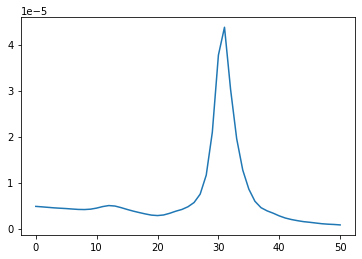

In [3]:
data_path = "./data"
# define the intial and final dipole sets
config = {'gpu_device': '/GPU:0',
            'dipole_length': 0.41,
            'min_wavelength': 0.4,
            'max_wavelength': 0.9,
            'num_wavelengths': 51,
            'ref_medium': 1.333,
            'rotation_steps': 10,
            'folder_path': data_path,
            'calculate_electricField': False,
            'ref_data': [str(current_folder_path) + '/Au_ref_index.csv',str(current_folder_path) + '/Ag_ref_index.csv'],
            'metals': ["Au","Ag"],
            'dipole_data': str(current_folder_path) + '/data/initial_dipoles.csv',
            "ratio":[1.0, 0],
            "lattice_constant":0.41,
            "method":"homo",
            "atom_data":None
           }
np_dda = DDA(config)
np_dda.run_DDA()
np_dda.plot_spectra()
# Save the cross section data
np.savetxt(config['folder_path'] +"/initial_data.csv",np.array(np_dda.C_cross_total),delimiter=",")
plt.plot(np.array(np_dda.C_cross_total))

# Read in the trajectories

In [3]:
initial_dipoles = np.loadtxt('./data/initial_dipoles.csv',delimiter=',')
structures = [initial_dipoles for repeat in range(10)]
dipole_change_num_total = []
for repeat in range(10):
    dipole_change_num = []
    for step in range(1,300):
        atom1 = np.loadtxt(f"./data/atom_{step-1}.csv",delimiter=',')
        atom2 = np.loadtxt(f"./data/atom_{step}.csv",delimiter=',')
        if len(atom1) == len(atom2):
            pass
        else:
            extra_dipoles = np.loadtxt(f'./data/dipole_change_{repeat}_{step}.csv',delimiter=',')
            if len(extra_dipoles) == 0:
                pass
            else:
                extra_dipoles = extra_dipoles.reshape(-1,3)
                structures[repeat] = np.vstack((structures[repeat],extra_dipoles))
                dipole_change_num.append(extra_dipoles)
    dipole_change_num_total.append(dipole_change_num)
for repeat in range(10):
    np.savetxt(f'./data/final_structure_{repeat}.csv',structures[repeat],delimiter=',')

/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_0_11.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_0_31.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_0_51.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_0_71.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_0_91.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_la

/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_5_11.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_5_31.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_5_51.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_5_71.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: loadtxt: Empty input file: "./data/dipole_change_5_91.csv"
  if sys.path[0] == '':
/home/yibin/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_la

In [8]:
[[len(dipole_change_num_total[i][j]) for j in range(len(dipole_change_num_total[i]))] for i in range(len(dipole_change_num_total))]

[[408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56],
 [408, 420, 416, 396, 360, 308, 240, 156, 56]]

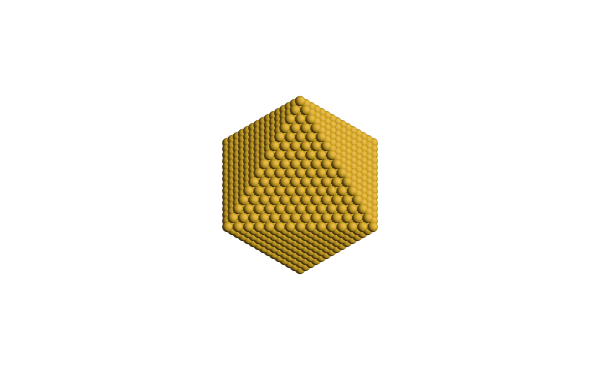

In [4]:
scene = fresnel.Scene()
geometry = fresnel.geometry.Sphere(scene, N=len(structures[0]), radius=np.sqrt(2)/2)
geometry.position[:] = structures[0]
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.9, 0.714, 0.169]), roughness = 0.2)
fresnel.preview(scene)

# Simulate the octahedra at the end

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202623e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.51009635e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416936e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794193e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827227e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335019e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Ten

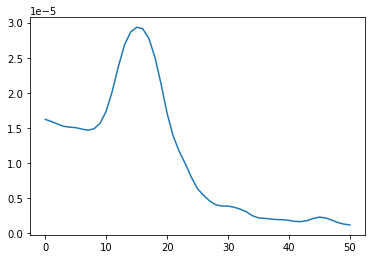

In [5]:
repeat = 5
data_path = "./data"
# define the intial and final dipole sets
config = {'gpu_device': '/GPU:0',
            'dipole_length': 0.41,
            'min_wavelength': 0.4,
            'max_wavelength': 0.9,
            'num_wavelengths': 51,
            'ref_medium': 1.333,
            'rotation_steps': 10,
            'folder_path': data_path,
            'calculate_electricField': False,
            'ref_data': [str(current_folder_path) + '/Au_ref_index.csv',str(current_folder_path) + '/Ag_ref_index.csv'],
            'metals': ["Au","Ag"],
            'dipole_data': str(current_folder_path) + f'/data/final_structure_{repeat}.csv',
            "ratio":[1.0, 0],
            "lattice_constant":0.41,
            "method":"homo",
            "atom_data":None
           }
np_dda = DDA(config)
np_dda.run_DDA()
np_dda.plot_spectra()
# Save the cross section data
np.savetxt(config['folder_path'] +"/final_data.csv",np.array(np_dda.C_cross_total),delimiter=",")
plt.plot(np.array(np_dda.C_cross_total))

# Calculate the trajecotry

In [3]:
repeat = 5
position1 = np.loadtxt(f'./data/initial_dipoles.csv',delimiter=',')
position2 = np.loadtxt(f'./data/final_structure_{repeat}.csv',delimiter=',')
print(len(position1))
print(len(position2))

1329
4089


In [4]:
for repeat in range(10):
    position1 = np.loadtxt(f'./data/initial_dipoles.csv',delimiter=',')
    position2 = np.loadtxt(f'./data/final_structure_{repeat}.csv',delimiter=',')
    print(abs(position2[0:1329] - position1).sum())
    print(len(position2))

0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089
0.0
4089


Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202623e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899872e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219082e-05, shape=(), dtype=float32)
4
tf.Tensor(1.51009635e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681995e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273239e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794197e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827222e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660652e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335024e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Ten

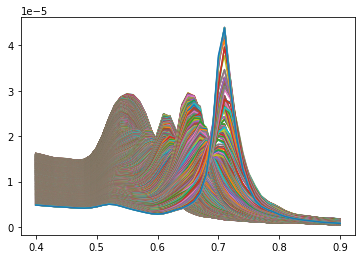

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202624e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545716e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100964e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670529e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273239e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794193e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827222e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660646e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335022e-05, shape=(), dtype=float32)
16
tf.Tensor(2.9105984e-05, shape=(), dtype=float32)
17
tf.Ten

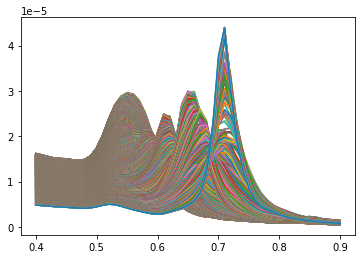

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202626e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545716e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.51009635e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.482179e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670529e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879186e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416936e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794197e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827222e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335022e-05, shape=(), dtype=float32)
16
tf.Tensor(2.9105984e-05, shape=(), dtype=float32)
17
tf.Ten

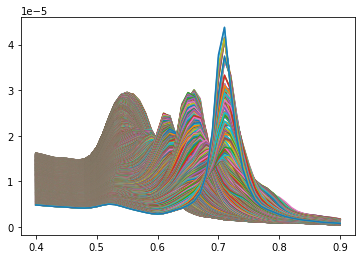

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202624e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899872e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100962e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030785e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.741694e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794195e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827218e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335028e-05, shape=(), dtype=float32)
16
tf.Tensor(2.9105984e-05, shape=(), dtype=float32)
17
tf.Tens

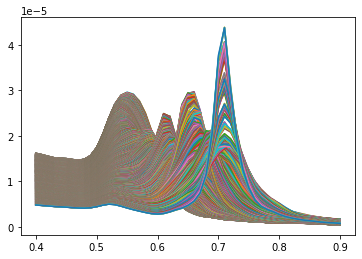

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202626e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545716e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100964e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.482179e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273235e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794191e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827222e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335028e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Tenso

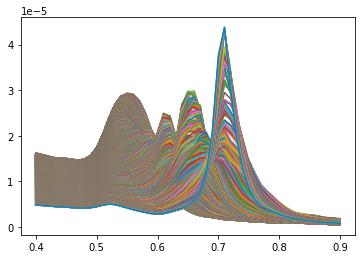

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202623e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.51009635e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416936e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794193e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827227e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335019e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Ten

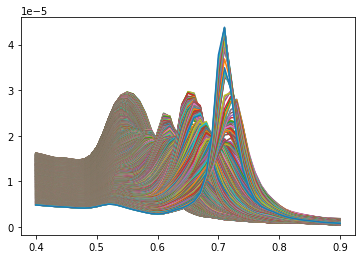

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202624e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545716e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219086e-05, shape=(), dtype=float32)
4
tf.Tensor(1.51009635e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.482179e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670529e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681995e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273239e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794195e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827218e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660641e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335024e-05, shape=(), dtype=float32)
16
tf.Tensor(2.9105984e-05, shape=(), dtype=float32)
17
tf.Ten

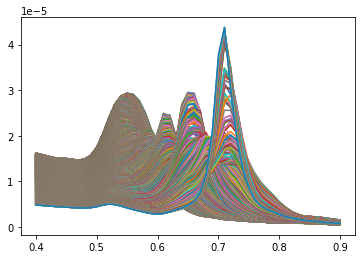

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202624e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899872e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100964e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.482179e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670529e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794193e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827222e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660641e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335022e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Tenso

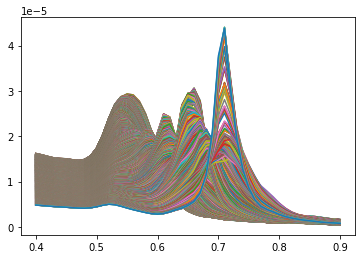

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202623e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899872e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545715e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100962e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.4821788e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.7416938e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273239e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794195e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827212e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660641e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335019e-05, shape=(), dtype=float32)
16
tf.Tensor(2.9105982e-05, shape=(), dtype=float32)
17
tf.Ten

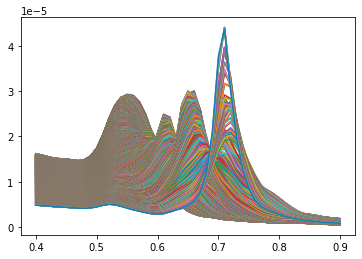

Reading refractive index and dipole data
Calculating radius of the cross section and polarizability
0
tf.Tensor(1.6202624e-05, shape=(), dtype=float32)
1
tf.Tensor(1.5899874e-05, shape=(), dtype=float32)
2
tf.Tensor(1.5545718e-05, shape=(), dtype=float32)
3
tf.Tensor(1.5219084e-05, shape=(), dtype=float32)
4
tf.Tensor(1.5100964e-05, shape=(), dtype=float32)
5
tf.Tensor(1.5030787e-05, shape=(), dtype=float32)
6
tf.Tensor(1.482179e-05, shape=(), dtype=float32)
7
tf.Tensor(1.4670527e-05, shape=(), dtype=float32)
8
tf.Tensor(1.4879188e-05, shape=(), dtype=float32)
9
tf.Tensor(1.5681997e-05, shape=(), dtype=float32)
10
tf.Tensor(1.741694e-05, shape=(), dtype=float32)
11
tf.Tensor(2.0273237e-05, shape=(), dtype=float32)
12
tf.Tensor(2.3794193e-05, shape=(), dtype=float32)
13
tf.Tensor(2.6827218e-05, shape=(), dtype=float32)
14
tf.Tensor(2.8660645e-05, shape=(), dtype=float32)
15
tf.Tensor(2.9335019e-05, shape=(), dtype=float32)
16
tf.Tensor(2.910599e-05, shape=(), dtype=float32)
17
tf.Tensor

In [ ]:
for repeat in range(10):
    data_path = "./data"
    # define the intial and final dipole sets
    config = {'gpu_device': '/GPU:0',
                'dipole_length': 0.41,
                'min_wavelength': 0.4,
                'max_wavelength': 0.9,
                'num_wavelengths': 51,
                'ref_medium': 1.333,
                'rotation_steps': 10,
                'folder_path': data_path,
                'calculate_electricField': False,
                'ref_data': [str(current_folder_path) + '/Au_ref_index.csv',str(current_folder_path) + '/Ag_ref_index.csv'],
                'metals': ["Au","Ag"],
                'dipole_data': str(current_folder_path) + f'/data/final_structure_{repeat}.csv',
                "ratio":[1.0, 0],
                "lattice_constant":0.41,
                "method":"homo",
                "atom_data":None
               }
    
    atom_index = np.flip([i for i in range(3*len(position1),3*len(position2))])
    atom_index = atom_index.flatten().tolist()
    rate = 10**10
    np_dda = DDA(config)
    alpha_j1 = np.array([np.repeat(np_dda.alpha_j[:,i],3) for i in range(np_dda.alpha_j.shape[1])]).T
    alpha_j2 = np.array([np.repeat(np_dda.alpha_j[:,i],3)/rate for i in range(np_dda.alpha_j.shape[1])]).T
    np_dda.flip_infor = [atom_index,alpha_j1,alpha_j2]
    t_total = np_dda.calculate_spectrum_trajectories_v2()
    t_total = np.array(t_total)
    np.savetxt(data_path+f'/time_{repeat}.csv',t_total,delimiter=',')
    np.savetxt(data_path+f'/C_cross_{repeat}.csv',np.array(np_dda.C_cross_total),delimiter=',')
    
    data_total = np.array(np_dda.C_cross_total)

    for i in range(int(data_total.shape[1])):
        plt.plot(np_dda.wl_exp,data_total[:,i])
    plt.show()

In [7]:
data_path = "./data"
for repeat in range(1,10):
    data1 = np.loadtxt(data_path+f'/C_cross_{repeat-1}.csv',delimiter=',')
    data2 = np.loadtxt(data_path+f'/C_cross_{repeat}.csv',delimiter=',')
    print(abs(data2[:,0] - data1[:,0]).max())
    
    a = np.loadtxt(data_path+f'/final_structure_{repeat-1}.csv',delimiter=',')
    b = np.loadtxt(data_path+f'/final_structure_{repeat}.csv',delimiter=',')
    a= a[np.lexsort((a[:,2], a[:,1],a[:,0]))]
    b = b[np.lexsort((b[:,2], b[:,1],b[:,0]))]
    
    print(abs(a-b).max())

1.2164491636212915e-10
0.0
1.432454155292362e-10
0.0
1.120952219935134e-10
0.0
1.5870682545937598e-10
0.0
1.261923898709938e-10
0.0
1.184616849059239e-10
0.0
8.43556335894391e-11
0.0
1.1800693755503744e-10
0.0
1.6643753042444587e-10
0.0
